# Importing Libraries

In [1]:
import pymc3 as pm
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

import warnings
warnings.filterwarnings("ignore")

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Question 3

In [2]:
df = pd.DataFrame([{"group": "placebo", "parameters": (31, 131)}, 
                  {"group": "nicotine", "parameters": (53, 193)},
                  {"group": "zyban", "parameters": (86, 160)},
                  {"group": "zyban & nicotine", "parameters": (96, 151)}])

In [3]:
alpha=0.05
for index, row in df.iterrows():
    df.loc[df["group"] == row["group"], "lower"] = beta.ppf(alpha/2, row["parameters"][0], row["parameters"][1])
    df.loc[df["group"] == row["group"], "upper"] = beta.ppf(1 - (alpha/2), row["parameters"][0], row["parameters"][1])
df

,group,parameters,lower,upper
0,placebo,"(31, 131)",0.134734,0.255194
1,nicotine,"(53, 193)",0.166444,0.268831
2,zyban,"(86, 160)",0.291345,0.410159
3,zyban & nicotine,"(96, 151)",0.328908,0.450128


## Question 4

In [4]:
df = pd.read_csv("Rats.csv", header=None, names=[8, 15, 22, 29, 36])
df.index = range(1, df.shape[0]+1)

x = []
y = []
for column in df.columns:
    for value in df[column]:
        x.append(column)
        y.append(value)

### a) and b)

In [5]:
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=1000)
    beta = pm.Normal("beta", mu=0, sigma=1000)
    sigma = pm.Gamma("sigma", alpha=0.001, beta=0.001)
    
    mu = alpha + (beta * x)
    observations = pm.Normal("observations", mu=mu, sigma=sigma, observed=y)
    trace = pm.sample(draws=1000, chains=3, random_seed=42, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 878 seconds.
The acceptance probability does not match the target. It is 0.9031790924798925, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.899352879507454, but should be close to 0.8. Try to increase the number of tuning steps.


### c)

In [6]:
first_chain=trace.sel(chain=[0], drop=False)

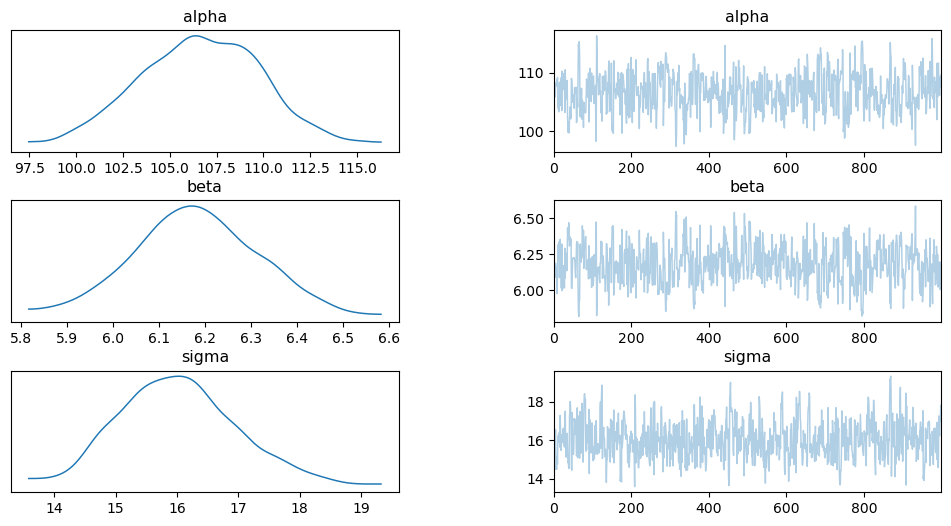

In [7]:
az.plot_trace(first_chain)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

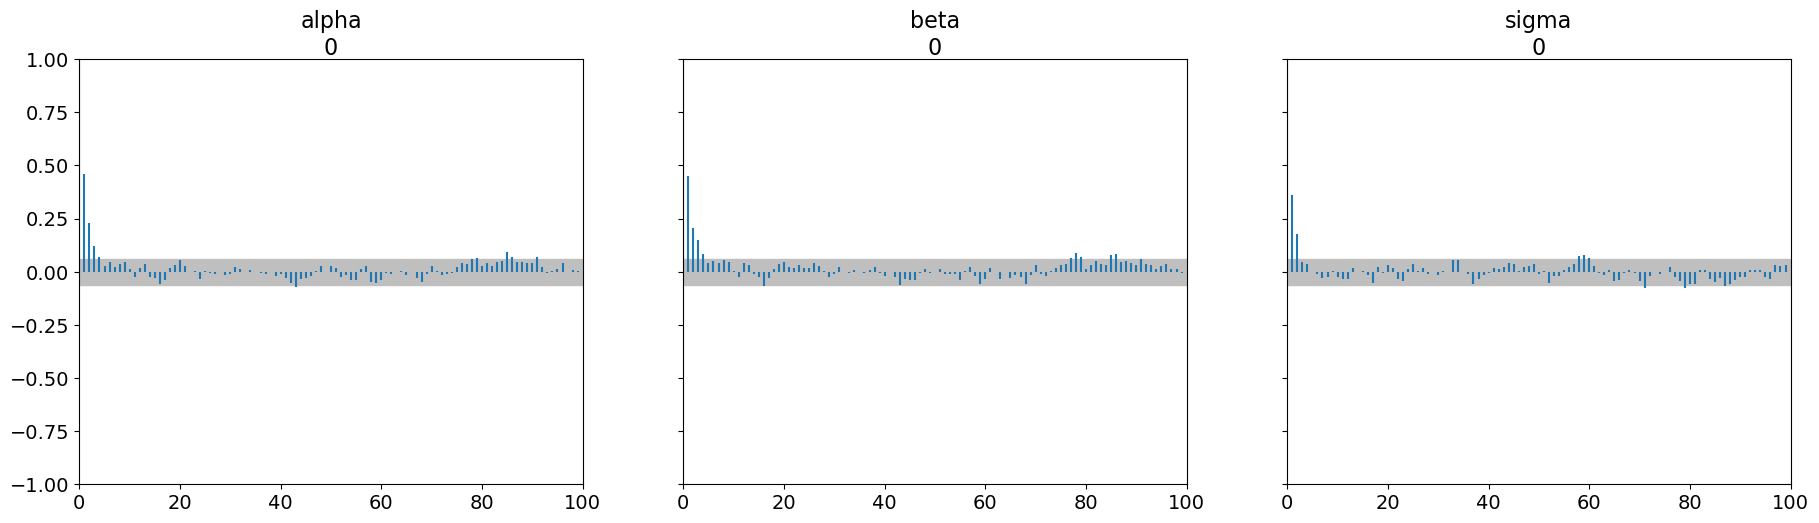

In [8]:
az.plot_autocorr(first_chain)
plt.show()

In [9]:
az.summary(first_chain)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,106.638,3.257,100.237,112.405,0.181,0.128,323.0,370.0,NaN
beta,6.179,0.134,5.951,6.452,0.008,0.005,311.0,346.0,NaN
sigma,16.032,0.973,14.440,18.023,0.046,0.033,473.0,369.0,NaN


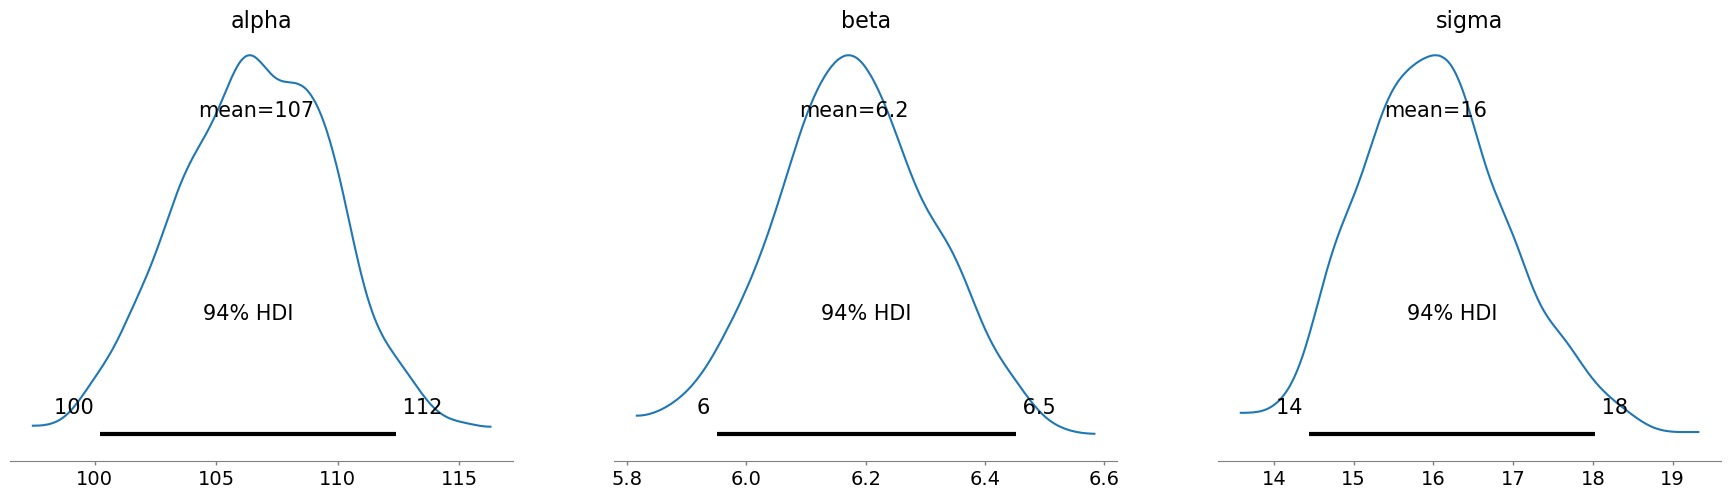

In [10]:
az.plot_posterior(first_chain)
plt.show()

### d)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    alpha    float64 1.001
    beta     float64 1.002
    sigma    float64 1.0


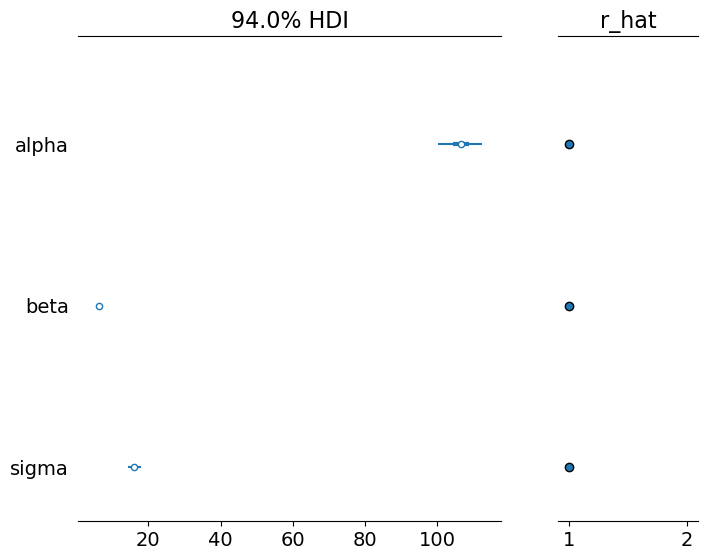

In [11]:
gelman_rubin = az.rhat(trace)
print(gelman_rubin)

az.plot_forest(trace, r_hat=True, combined=True)
plt.show()

### e)

In [12]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,106.502,3.208,100.328,112.423,0.114,0.081,784.0,1204.0,1.0
beta,6.185,0.131,5.947,6.437,0.005,0.003,801.0,1070.0,1.0
sigma,15.992,0.951,14.352,17.852,0.026,0.019,1363.0,1122.0,1.0


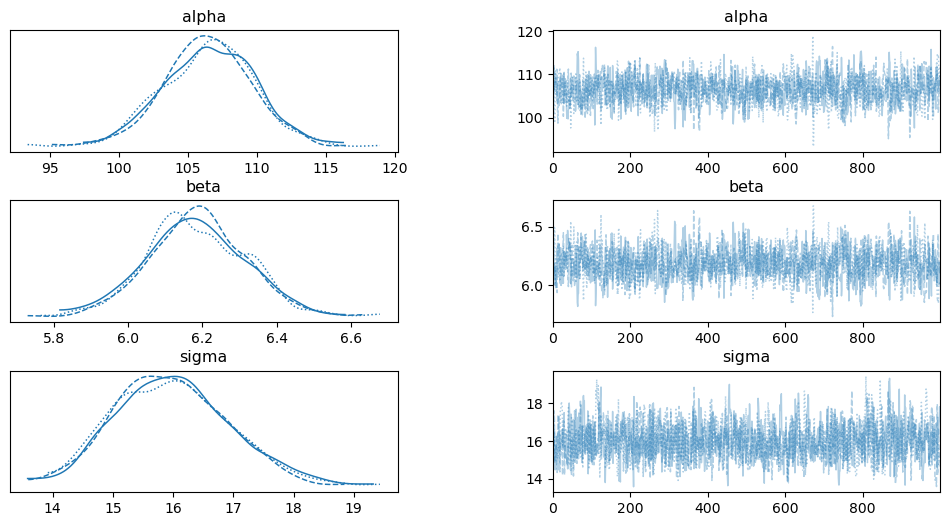

In [13]:
az.plot_trace(trace)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

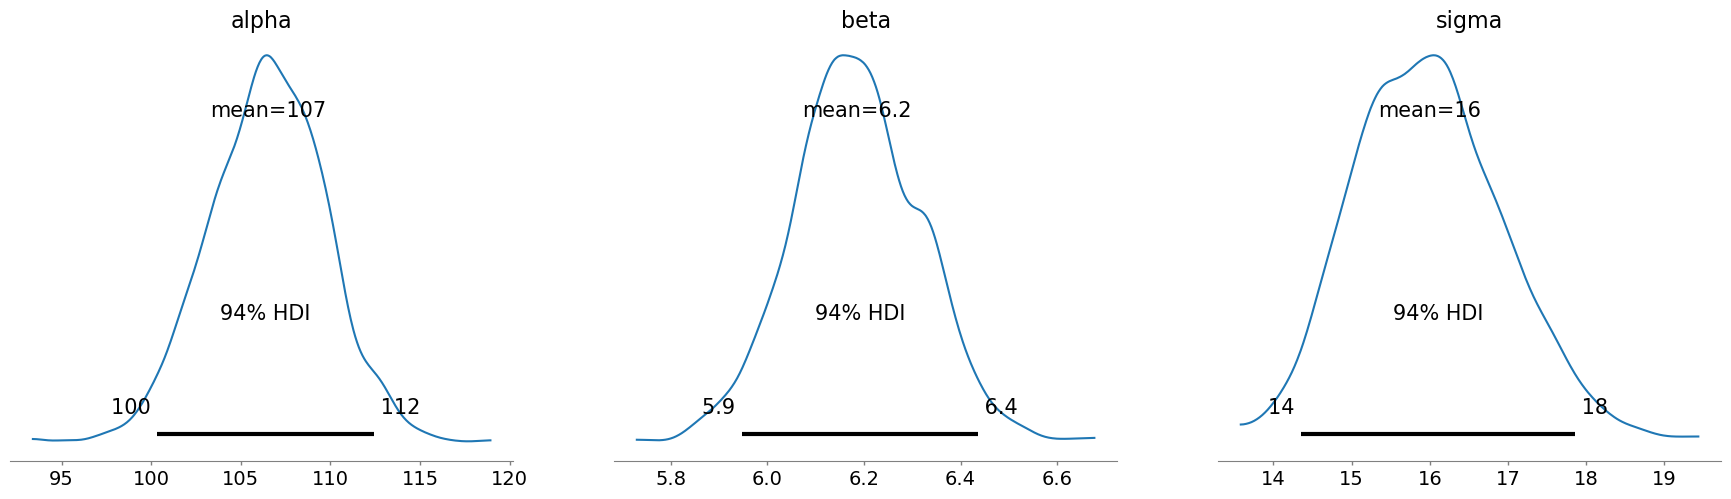

In [14]:
az.plot_posterior(trace)
plt.show()